In [71]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm.notebook import trange
from IPython.display import clear_output
from scipy.stats import norm
from scipy.integrate import simps

# Sampling from continuous variables

In [72]:
def f(a,x):
    dim_a = a.shape[0]
    dim_x = x.shape[0]
    x_powervector = np.empty((dim_a,dim_x))
    for n in range(dim_a):
        x_powervector[n,:]  = x**n
    return a.dot(x_powervector)

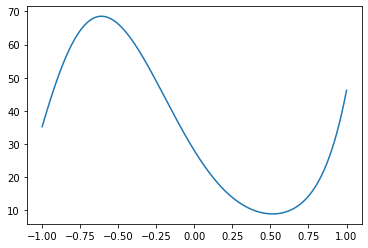

In [75]:
x = np.linspace(-1,1,1000)
polynom_order = 4
a = np.random.rand(polynom_order)*10*(np.random.randint(0,2,(polynom_order,))*2-1)
plt.plot(x,f(a,x)**2)

In [76]:
N_steps = 100
N_samples = 100000
x0 = 2*np.random.rand(N_samples)-1
x = [x0]
for i in range(N_steps):
    x_next = 2*np.random.rand(N_samples)-1.
    ratio = f(a,x_next)**2/f(a,x0)**2
    rnd_nmb = np.random.rand(N_samples)
    condition = rnd_nmb<ratio
    x0[np.nonzero(condition)] = x_next[np.nonzero(condition)]

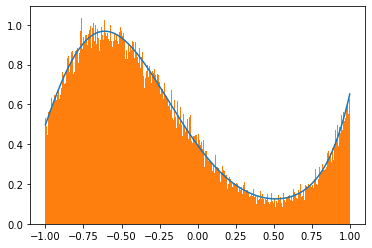

In [77]:
x = np.linspace(-1,1,1000)
Z = simps(f(a,x)**2,x)
plt.plot(x,f(a,x)**2/Z)
plt.hist(x0,bins = 500,density=True)
plt.show()

# Travelling Salesman via Simulated Annealing

In [86]:
N_cities = 100
cities = 10*torch.randn((N_cities,2))
order = torch.randperm(cities.shape[0]).type(torch.long)
cities_rearranged = cities[order,:]

In [87]:
L = (cities.reshape(cities.shape[0],1,2) - cities.reshape(1,cities.shape[0],2))**2
lengths = torch.sqrt(torch.sum(L,2))

In [88]:
def length(order,lengths):
    order1 = torch.zeros(order.shape[0],dtype=torch.long)
    order1[:-1] = order[1:]
    order1[-1] = order[0]
    return torch.sum(lengths[(order,order1)])

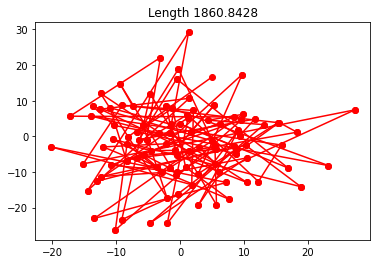

In [89]:
for i in range(cities.shape[0]-1):
    plt.plot(cities_rearranged[i:i+2,0].numpy(),cities_rearranged[i:i+2,1].numpy(),'ro-')
plt.title('Length ' + str(length(order,lengths).numpy()))
plt.show()

In [104]:
N_steps = 100000
beta_i = 0.01
beta_f = 2.
beta = (beta_f-beta_i)/N_steps*torch.arange(N_steps,dtype = torch.float32) + beta_i

In [105]:
def sa(lengths,beta,order_in):
    N_steps = beta.shape[0]
    N_cities = lengths.shape[0]
    order = order_in
    count = 0
    L_ar = []
    L_ar.append(length(order,lengths).numpy())
    for i in trange(N_steps):
        lk = np.random.choice(N_cities,2,replace=False)
        l = torch.nonzero(lk[0]==order)[0][0]
        k = torch.nonzero(lk[1]==order)[0][0]
        L_lk = length(order,lengths)
        order_kl = torch.clone(order)
        order_kl[l] = order[k]
        order_kl[k] = order[l]
        L_kl = length(order_kl,lengths)
        if torch.rand(1)[0]<torch.exp(-beta[i]*(L_kl - L_lk)):
            order = order_kl
        count+=1
        if count==1000:
            count = 0
            clear_output(True)
            L_ar.append(length(order,lengths).numpy())
            plt.plot(L_ar)
            plt.show()
            print(L_ar[-1])
        
    return order,L_ar

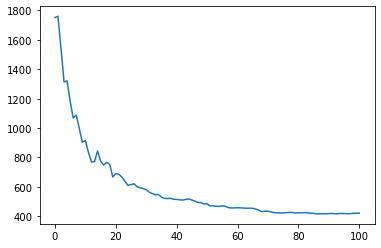

421.8377



In [106]:
order_in = torch.randperm(cities.shape[0]).type(torch.long)
order,L_ar = sa(lengths,beta,order_in)

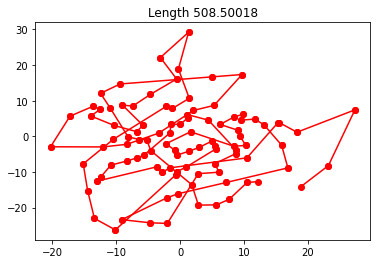

In [96]:
cities_rearranged = cities[order,:]
for i in range(cities.shape[0]-1):
    plt.plot(cities_rearranged[i:i+2,0],cities_rearranged[i:i+2,1],'ro-')
plt.title('Length ' + str(length(order,lengths).numpy()))
plt.show()

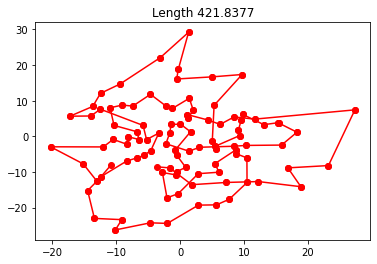

In [107]:
cities_rearranged = cities[order,:]
for i in range(cities.shape[0]-1):
    plt.plot(cities_rearranged[i:i+2,0],cities_rearranged[i:i+2,1],'ro-')
plt.title('Length ' + str(length(order,lengths).numpy()))
plt.show()